<a href="https://colab.research.google.com/github/atakhadivi/Image-classification/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Load the CIFAR-10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


Preprocess the data

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


Define the model architecture

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])


Compile the model

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Train the model

In [6]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 63s 39ms/step - loss: 1.5203 - accuracy: 0.4446 - val_loss: 1.2875 - val_accuracy: 0.5322
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1484 - accuracy: 0.5926 - val_loss: 1.0975 - val_accuracy: 0.6214
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9981 - accuracy: 0.6506 - val_loss: 0.9719 - val_accuracy: 0.6625
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.9092 - accuracy: 0.6795 - val_loss: 0.9458 - val_accuracy: 0.6756
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8401 - accuracy: 0.7050 - val_loss: 0.8905 - val_accuracy: 0.6942
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7745 - accuracy: 0.7291 - val_loss: 0.8993 - val_accuracy: 0.6931
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7294 - accuracy: 0.7441 - val_loss: 0.8971 -

Evaluate the model

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 4s - loss: 0.8711 - accuracy: 0.7119 - 4s/epoch - 12ms/step
Test accuracy: 0.711899995803833


Visualize the results

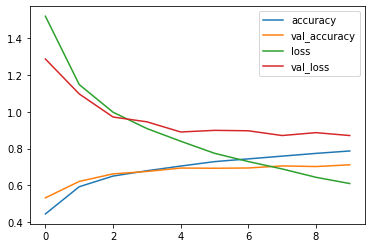

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
